In [51]:
import numpy as np  
import scipy as sp  
from numpy.random import random
import urllib.request
import scipy.optimize
import csv
import copy
import random
from sklearn import svm
from collections import defaultdict
import gzip
import matplotlib  
import matplotlib.pyplot as plt  

In [77]:
###  Read from csv
print ("Reading data...")

data = []
labels = []
featureName = []
file = open("washed_data.csv")
for l in csv.reader(file):
    data.append(l[1:])
featureName = data[0]
del data[0]

file = open("alllabel.csv")
for l in csv.reader(file):
    labels.append(l[1:][0])
#del labels[0]


print ("done")

Reading data...
done


In [17]:
### explore dataset

25979

In [79]:
### number of matches, percentage of hometeam wins/loses/draws
matchNum = len(labels)
homeWinNum = len([l for l in labels if l=='Win'])
homeDrawNum = len([l for l in labels if l=='Draw'])
homeDefeatNum = len([l for l in labels if l=='Defeat'])
print ("Number of matches: "+str(matchNum))
print ("home team wins: "+str(homeWinNum*1.0/matchNum))
print ("away team wins: "+str(homeDefeatNum*1.0/matchNum))
print ("two teams draw: "+str(homeDrawNum*1.0/matchNum))

Number of matches: 25979
home team wins: 0.45871665576042187
away team wins: 0.28738596558759
two teams draw: 0.25389737865198814


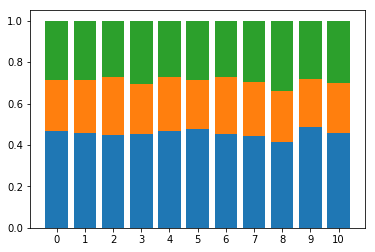

In [80]:
### for each league

league_info = [[0,0,0,0] for i in range(11)]   # matches, hometeam wins/draws/loses

for i in range(matchNum):
    label = labels[i]
    for j in range(7,18,1):
        if int(data[i][j])==1:
            league_info[j-7][0]+=1
            if label=='Win':
                league_info[j-7][1] += 1
            if label=='Draw':
                league_info[j-7][2] += 1
            if label=='Defeat':
                league_info[j-7][3] += 1

league = ['Belgium Jupiler League','England Premier League','France Ligue 1','Germany 1. Bundesliga'
         ,'Italy Serie A','Netherlands Eredivisie','Poland Ekstraklasa','Portugal Liga ZON Sagres',
         'Scotland Premier League','Spain LIGA BBVA','Switzerland Super League']
winByLeague = []
drawByLeague = []
defeatByLeague = []

for row in league_info:
    winByLeague.append(row[1]*1.0/row[0])
    drawByLeague.append(row[2]*1.0/row[0])
    defeatByLeague.append(row[3]*1.0/row[0])
    
### plot
bar_width = 0.35
index = np.arange(11)
plt.bar(index,winByLeague)
plt.bar(index,drawByLeague,bottom=winByLeague)
plt.bar(index,defeatByLeague,bottom=[winByLeague[i]+drawByLeague[i] for i in range(11)])
plt.xticks(index, index)  
plt.show()

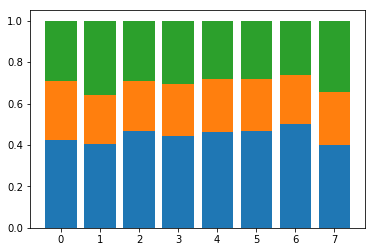

In [99]:
### influence of rest time on match
match = [0]*8
homeWin = [0]*8
homeDraw = [0]*8
homeDefeat = [0]*8
for i in range(matchNum):
    m = data[i]
    label = labels[i]
    timeDiff = float(m[6])/3600/24
    idx = 0
    if timeDiff < -5:
        idx = 0
    elif timeDiff <-3:
        idx = 1
    elif timeDiff <-1:
        idx = 2
    elif timeDiff <0:
        idx = 3
    elif timeDiff <1:
        idx = 4
    elif timeDiff <3:
        idx = 5
    elif timeDiff <5:
        idx = 6
    else: idx = 7
    match[idx] += 1
    if label=='Win':
        homeWin[idx]+=1
    elif label=='Draw':
        homeDraw[idx]+=1
    else: homeDefeat[idx]+=1

homeWinPct = []
homeDrawPct = []
homeDefeatPct = []

for i in range(8):
    homeWinPct.append(homeWin[i]*1.0/match[i])
    homeDrawPct.append(homeDraw[i]*1.0/match[i])
    homeDefeatPct.append(homeDefeat[i]*1.0/match[i])

### plot
bar_width = 0.35
index = np.arange(8)
plt.bar(index,homeWinPct)
plt.bar(index,homeDrawPct,bottom=homeWinPct)
plt.bar(index,homeDefeatPct,bottom=[homeWinPct[i]+homeDrawPct[i] for i in range(8)])
plt.xticks(index, index)  
plt.show()

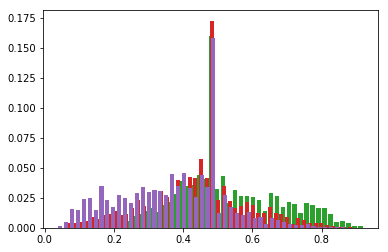

In [122]:
### explore lottery
B365Win_win = []
B365Draw_win = []
B365Defeat_win = []
B365Win_draw = []
B365Draw_draw = []
B365Defeat_draw = []
B365Win_defeat = []
B365Draw_defeat = []
B365Defeat_defeat = []

for i in range(matchNum):
    match = data[i]
    label = labels[i]
    B365Win = float(match[-6])
    B365Draw = float(match[-5])
    B365Defeat = float(match[-4])
    if label=='Win':
        B365Win_win.append(B365Win)
        B365Draw_win.append(B365Draw)
        B365Defeat_win.append(B365Defeat)
    elif label=='Draw':
        B365Win_draw.append(B365Win)
        B365Draw_draw.append(B365Draw)
        B365Defeat_draw.append(B365Defeat)
    else:
        B365Win_defeat.append(B365Win)
        B365Draw_defeat.append(B365Draw)
        B365Defeat_defeat.append(B365Defeat)

hist, bins = np.histogram(B365Win_win, bins=50)
hist = [i*1.0/len(B365Win_win) for i in hist]
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)


hist, bins = np.histogram(B365Win_draw, bins=50)
hist = [i*1.0/len(B365Win_draw) for i in hist]
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

hist, bins = np.histogram(B365Win_defeat, bins=50)
hist = [i*1.0/len(B365Win_defeat) for i in hist]
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

plt.show()

In [100]:
featureName

['home_team_goals_difference',
 'away_team_goals_difference',
 'games_won_home_team',
 'games_won_away_team',
 'games_against_won',
 'games_against_lost',
 'match_time_difference',
 'League_1.0',
 'League_1729.0',
 'League_4769.0',
 'League_7809.0',
 'League_10257.0',
 'League_13274.0',
 'League_15722.0',
 'League_17642.0',
 'League_19694.0',
 'League_21518.0',
 'League_24558.0',
 'home_player_1_overall_rating',
 'home_player_2_overall_rating',
 'home_player_3_overall_rating',
 'home_player_4_overall_rating',
 'home_player_5_overall_rating',
 'home_player_6_overall_rating',
 'home_player_7_overall_rating',
 'home_player_8_overall_rating',
 'home_player_9_overall_rating',
 'home_player_10_overall_rating',
 'home_player_11_overall_rating',
 'away_player_1_overall_rating',
 'away_player_2_overall_rating',
 'away_player_3_overall_rating',
 'away_player_4_overall_rating',
 'away_player_5_overall_rating',
 'away_player_6_overall_rating',
 'away_player_7_overall_rating',
 'away_player_8_overa